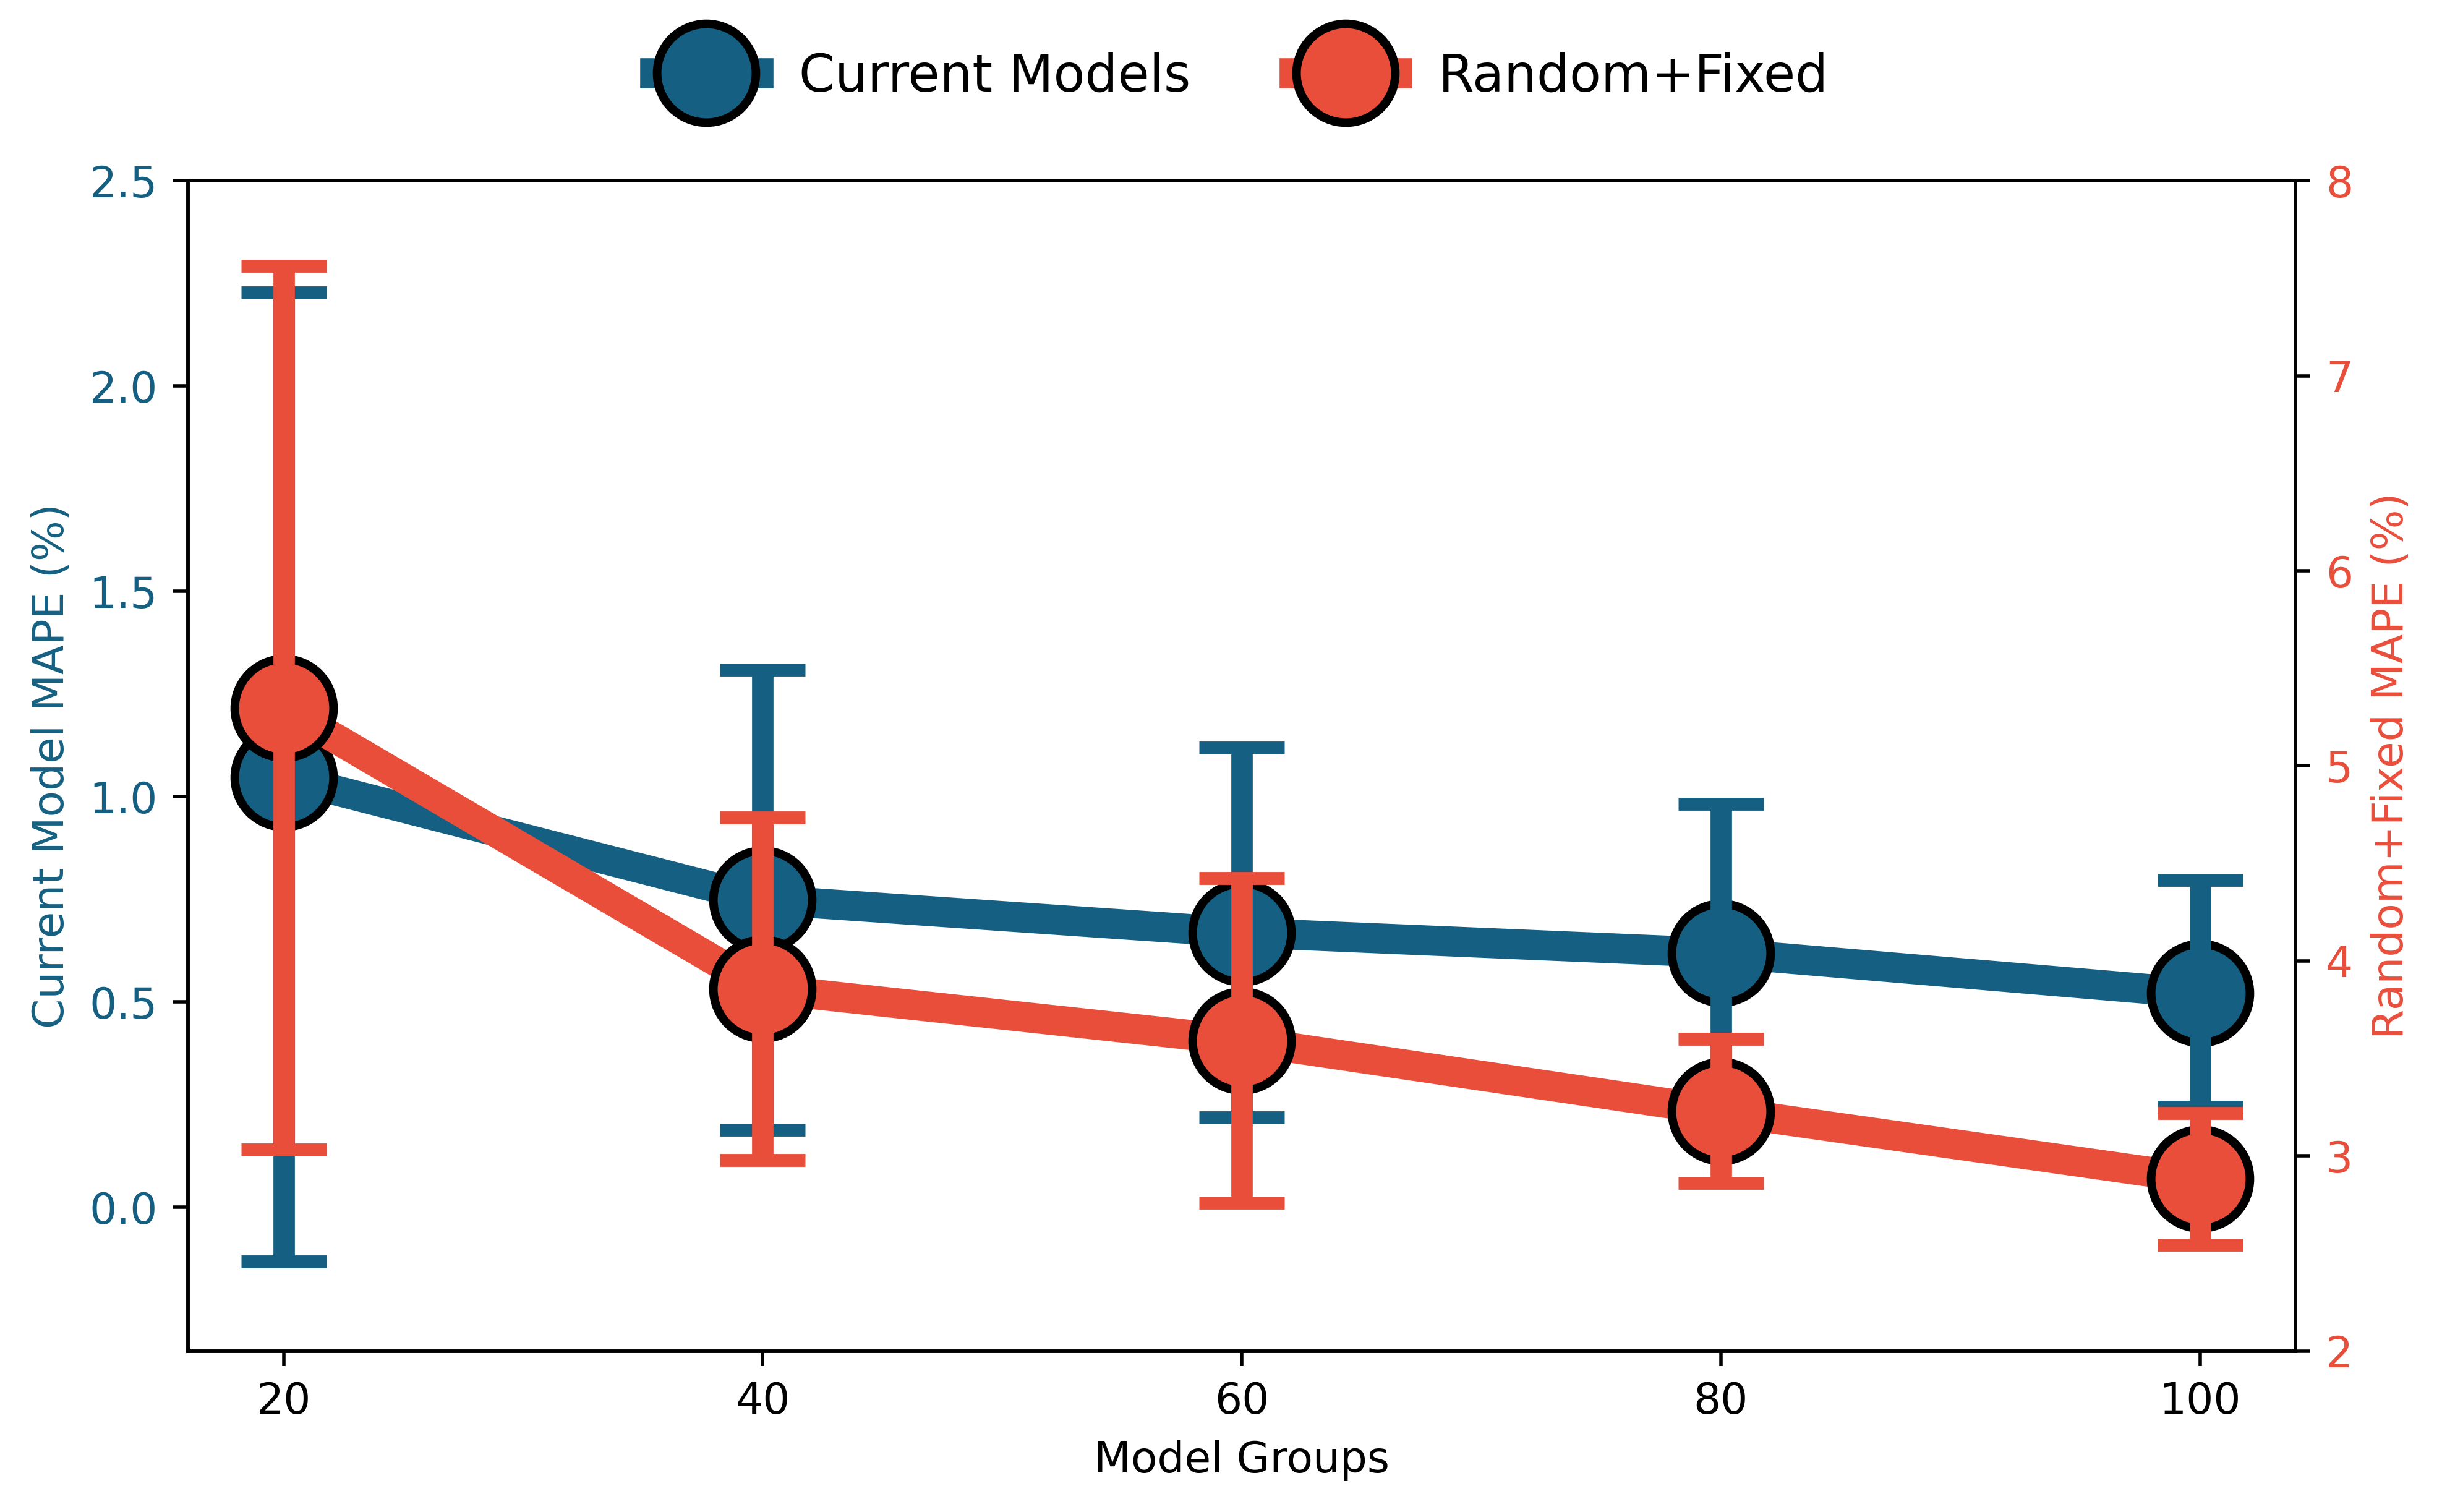

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

def recreate_comparison_plot(csv_path, output_dir=None):
    df = pd.read_csv(csv_path)
    
    current_models = df[~df['Group'].isin(['Random', 'Fixed'])]
    random_models = df[df['Group'] == 'Random']
    fixed_models = df[df['Group'] == 'Fixed']
    
    results = []
    model_names = sorted(current_models['Model'].unique())
    
    for model in model_names:
        current_data = current_models[current_models['Model'] == model]['MAPE']
        avg_current = np.nanmean(current_data)
        std_current = np.nanstd(current_data)
        
        random_data = random_models[random_models['Model'] == model]['MAPE']
        fixed_data = fixed_models[fixed_models['Model'] == model]['MAPE']
        combined_data = pd.concat([random_data, fixed_data])
        avg_combined = np.nanmean(combined_data)
        std_combined = np.nanstd(combined_data)
        
        results.append({
            'Model': model,
            'Current': avg_current,
            'Current_std': std_current,
            'Combined': avg_combined,
            'Combined_std': std_combined
        })
    
    plot_df = pd.DataFrame(results)
    
    fig, ax1 = plt.subplots(figsize=(8, 5), dpi=500)
    ax2 = ax1.twinx()
    
    ax1.set_ylim(-0.35, 2.5)
    ax1.set_ylabel('Current Model MAPE (%)', color='#156082')
    ax1.tick_params(axis='y', labelcolor='#156082')
    
    ax2.set_ylim(2, 8)
    ax2.set_ylabel('Random+Fixed MAPE (%)', color='#E94E3B')
    ax2.tick_params(axis='y', labelcolor='#E94E3B')
    
    x = np.arange(len(model_names))
    line1 = ax1.plot(x, plot_df['Current'], 
                    color='#156082',
                    linestyle='-',
                    marker='o',
                    markersize=23,
                    markeredgecolor='black',
                    markeredgewidth=2,
                    linewidth=7,
                    label='Current Models')
    
    line2 = ax2.plot(x, plot_df['Combined'], 
                    color='#E94E3B',
                    linestyle='-',
                    marker='o',
                    markersize=23,
                    markeredgecolor='black',
                    markeredgewidth=2,
                    linewidth=7,
                    label='Random+Fixed')
    
    ax1.errorbar(x, plot_df['Current'], yerr=plot_df['Current_std'],
               fmt='none', ecolor='#156082', capsize=10, elinewidth=5, capthick=3)
    ax2.errorbar(x, plot_df['Combined'], yerr=plot_df['Combined_std'],
               fmt='none', ecolor='#E94E3B', capsize=10, elinewidth=5, capthick=3)
    
    ax1.set_xticks(x)
    ax1.set_xticklabels(model_names)
    ax1.set_xlabel('Model Groups')
    
    lines = line1 + line2
    labels = [l.get_label() for l in lines]
    ax1.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, 1.15),
              ncol=2, fontsize=12, frameon=False)
    
    plt.tight_layout()

    plt.show()
    
    return plot_df
if __name__ == "__main__":
    csv_path = 'fig5b.csv'
    result_df = recreate_comparison_plot(
        csv_path=csv_path, 
    )
